# Trump tweets data cleaning

In [1]:
import pandas as pd
df = pd.read_csv("Final Trump Tweets 2016.csv")
df.head()

,Date,Tweet
0,7/19/2016,Will be on @OreillyFactor tonight at 8:30pm @F...
1,7/19/2016,"It was truly an honor to introduce my wife, Me..."
2,7/19/2016,@RoxaneTancredi: Democrats are coming to TRUMP...
3,7/19/2016,#MakeAmericaWorkAgain#TrumpPence16 #RNCinCLE h...
4,7/19/2016,#MakeAmericaWorkAgain #TrumpPence16 #RNCinCLE ...


In [13]:
import pandas as pd
import re
import glob

# Define preprocessing function
def clean_dataset(file_path):
    df = pd.read_csv(file_path)

    # Rename columns
    df = df.rename(columns={'Date_name': 'Date'})

    # df = df.drop('Date_selection1',axis=1)

    # Add Politician name
    df["Politician_name"] = "Donald Trump"

    # Remove ordinal suffixes (st, nd, rd, th) from the 'Date' column
    df['Date'] = df['Date'].str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)

    # Remove timezone info (e.g., 'EST')
    df['Date'] = df['Date'].apply(lambda x: re.sub(r'\s-\s.*', '', str(x)))  # Remove everything after " - "

    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Format the date as 'YYYY-MM-DD'
    df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

    df = df.dropna()

    return df

# Load and clean all datasets
file_paths = ["Final Trump Tweets 2016.csv", "Final Trump Tweets 2018.csv", 
              "Final Trump Tweets 2020.csv", "Final Trump Tweets 2022.csv"]

cleaned_dfs = [clean_dataset(file) for file in file_paths]

# Optionally, merge all datasets into a single DataFrame
final_df = pd.concat(cleaned_dfs, ignore_index=True)


All datasets cleaned and saved as 'Cleaned_Trump_Tweets.csv'.


In [14]:
final_df.columns

Index(['Date', 'Tweet', 'Politician_name', 'Date_selection1'], dtype='object')

In [19]:
final_df = final_df.drop('Date_selection1', axis=1)
final_df.columns

# Save the cleaned dataset
final_df.to_csv("Cleaned_Trump_Tweets.csv", index=False)

print("All datasets cleaned and saved as 'Cleaned_Trump_Tweets.csv'.")


All datasets cleaned and saved as 'Cleaned_Trump_Tweets.csv'.


# Alexandria Ocasio-Cortez Tweets cleaning

In [50]:
AOC_data = ["AOC-2020.csv", "AOC-2022.csv"]
def cleaning_data(i):
    df = pd.read_csv(i)
    df = df.drop(columns=['Post Type','Video Thumbnail','Image', 'Like', 'Retweet','Reply','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'], errors = 'ignore', axis=1)
    df = df.rename(columns={'Content':'Tweet'})
    df['Tweet'] = df['Tweet'].str.split('\n\n')
    df = df.explode('Tweet', ignore_index=True)
    
    df['Date'] = df['Date'].str.split('T').str[0]
    df['Politician_name'] = ['Alexandria Ocasio-Cortez' for i in range(len(df))]
    df = df.dropna()
    print(df.columns)
    print(df.head())
    return df
AOC_cleaned_df = [cleaning_data(i) for i in AOC_data]
final_df = pd.concat(AOC_cleaned_df, ignore_index=True)
print(final_df.columns)
final_df.to_csv("Cleaned_AOC_Tweets.csv", index=False)
print("Cleaned data saved to Cleaned_AOC_Tweets.csv")

Index(['Date', 'Tweet', 'Politician_name'], dtype='object')
         Date                                              Tweet  \
0  2021-03-30  This is not nearly enough. The important conte...   
1  2021-03-30  For context, the COVID package was $1.9T for t...   
2  2021-03-30  Needs to be way bigger.The White House is expe...   
3  2021-03-30  $650 billion to rebuild U.S. infrastructure\n$...   
4  2021-03-30  Amazon workers in my district organized to mee...   

            Politician_name  
0  Alexandria Ocasio-Cortez  
1  Alexandria Ocasio-Cortez  
2  Alexandria Ocasio-Cortez  
3  Alexandria Ocasio-Cortez  
4  Alexandria Ocasio-Cortez  
Index(['Date', 'Tweet', 'Politician_name'], dtype='object')
         Date                                              Tweet  \
0  2023-03-30  Oh! Are we proposing trades now? If so, I’d be...   
1  2023-03-30  You bet I did. NYC doesn’t play with bigots an...   
2  2023-03-30                         Have a great day! 🙂🏳️‍⚧️💕    
4  2023-03-27  “It’

# BernieSanders data cleaning

In [53]:
bernie_df_sample = pd.read_csv("BernieSanders_all_2021.csv")
print(bernie_df_sample.head())
print("Null\n")
print(bernie_df_sample.isna().sum())
print("Columns:\n")
print(bernie_df_sample.columns)

                       Date Post Type  \
0  2022-12-29T18:47:40.000Z      text   
1  2022-12-25T19:37:46.000Z      text   
2  2022-12-23T16:10:27.000Z      text   
3  2022-12-19T17:56:19.000Z      text   
4  2022-12-06T14:47:50.000Z      text   

                                             Content Video Thumbnail Image  \
0  Corporate greed is Southwest getting a $7 bill...             NaN   NaN   
1  Jane and I want to wish everyone a wonderful C...             NaN   NaN   
2  The American people should not be forced to pa...             NaN   NaN   
3  The Republicans are right. 60% of workers are ...             NaN   NaN   
4  It is unacceptable that while Rutgers Universi...             NaN   NaN   

   Like Retweet Reply Unnamed: 8 Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0   55K    9.5K    2K        NaN        NaN          NaN          NaN   
1   12K     484   486        NaN        NaN          NaN          NaN   
2  4.5K     739   301        NaN        NaN          NaN         

In [56]:
BernieSanders_data = ['BernieSanders_all_2021.csv','BernieSanders_all_2022.csv','BernieSanders_all_2023.csv']
def cleaning_data(i):
    df = pd.read_csv(i)
    df = df.drop(columns=['Post Type','Video Thumbnail','Image', 'Like', 'Retweet','Reply','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'], errors = 'ignore', axis=1)
    df = df.rename(columns={'Content':'Tweet'})
    df['Tweet'] = df['Tweet'].str.split('\n\n')
    df = df.explode('Tweet', ignore_index=True)
    
    df['Date'] = df['Date'].str.split('T').str[0]
    df['Politician_name'] = ['Alexandria Ocasio-Cortez' for i in range(len(df))]
    df = df.dropna()
    # print(df.columns)
    # print(df.head())
    return df
BernieSanders_cleaned_df = [cleaning_data(i) for i in BernieSanders_data]
BernieSanders_final_df = pd.concat(BernieSanders_cleaned_df, ignore_index=True)
print(BernieSanders_final_df.columns)
print(BernieSanders_final_df.isna().sum())
BernieSanders_final_df.to_csv("Cleaned_BernieSanders_Tweets.csv", index=False)
print("Cleaned data saved to Cleaned_BernieSanders_Tweets.csv")

Index(['Date', 'Tweet', 'Politician_name'], dtype='object')
Date               0
Tweet              0
Politician_name    0
dtype: int64
Cleaned data saved to Cleaned_BernieSanders_Tweets.csv


# HawleyMO

In [57]:
Hawley_sample_df = pd.read_csv("HawleyMO-2018.csv")
print(Hawley_sample_df.head())
print("Null\n")
print(Hawley_sample_df.isna().sum())
print("Columns:\n")
print(Hawley_sample_df.columns)

                       Date Post Type  \
0  2019-03-29T20:14:52.000Z      text   
1  2019-03-29T13:57:51.000Z     image   
2  2019-03-28T20:47:09.000Z      text   
3  2019-03-28T15:21:03.000Z     video   
4  2019-03-28T11:57:58.000Z      text   

                                             Content Video Thumbnail  \
0  I’ll be introducing legislation next week to f...             NaN   
1  Blaise Hawley visits Daddy’s new office — and ...             NaN   
2  Google should do this in public. What are they...             NaN   
3  We need a special counsel to get answers from ...             NaN   
4  Time for Google to go on the record. Why are t...             NaN   

                                               Image  Like Retweet Reply  \
0                                                NaN    95      19    14   
1  https://pbs.twimg.com/media/D21MQvWW0AAEKvG?fo...   217      22    14   
2                                                NaN   105      53    24   
3  https://pbs.t

In [58]:
HawleyMO_data = ['HawleyMO-2018.csv','HawleyMO-2020.csv','HawleyMO-2022.csv']
def cleaning_data(i):
    df = pd.read_csv(i)
    df = df.drop(columns=['Post Type','Video Thumbnail','Image', 'Like', 'Retweet','Reply','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'], errors = 'ignore', axis=1)
    df = df.rename(columns={'Content':'Tweet'})
    df['Tweet'] = df['Tweet'].str.split('\n\n')
    df = df.explode('Tweet', ignore_index=True)
    
    df['Date'] = df['Date'].str.split('T').str[0]
    df['Politician_name'] = ['HawleyMO' for i in range(len(df))]
    df = df.dropna()
    # print(df.columns)
    # print(df.head())
    return df
HawleyMO_cleaned_df = [cleaning_data(i) for i in HawleyMO_data]
HawleyMO_final_df = pd.concat(HawleyMO_cleaned_df, ignore_index=True)
print(HawleyMO_final_df.columns)
print(HawleyMO_final_df.isna().sum())
HawleyMO_final_df.to_csv("Cleaned_HawleyMO_Tweets.csv", index=False)
print("Cleaned data saved to Cleaned_HawleyMO_Tweets.csv")

Index(['Date', 'Tweet', 'Politician_name'], dtype='object')
Date               0
Tweet              0
Politician_name    0
dtype: int64
Cleaned data saved to Cleaned_HawleyMO_Tweets.csv


# RonDeSantis

In [59]:
RonDeSantis_sample_df = pd.read_csv("RonDeSantis-2022.csv")
print(RonDeSantis_sample_df.head())
print("Null\n")
print(RonDeSantis_sample_df.isna().sum())
print("Columns:\n")
print(RonDeSantis_sample_df.columns)

                       Date Post Type  \
0  2023-03-14T13:30:29.000Z     video   
1  2023-03-12T17:14:24.000Z     video   
2  2023-03-12T03:08:42.000Z     image   
3  2023-03-11T00:44:57.000Z     image   
4  2023-03-10T17:06:54.000Z     image   

                                             Content Video Thumbnail  \
0  Good to be back in the great state of Nevada!\...             NaN   
1  THANK YOU, IOWA!\n\nTogether, Iowa and Florida...             NaN   
2  Great to be in Nevada tonight to share the pos...             NaN   
3  Bold leadership like that of Florida and Iowa ...             NaN   
4  Thank you for the warm welcome, Davenport! Gre...             NaN   

                                               Image  Like Retweet Reply  
0    https://pbs.twimg.com/media/FrLrdoFXoAISdfv.jpg  3.1K     371   956  
1    https://pbs.twimg.com/media/FrCO9_TXwAQJnOT.jpg  6.5K     774  1.5K  
2  https://pbs.twimg.com/media/Fq_PNtcXoAI7ThI?fo...  5.3K     506  1.4K  
3  https://pbs.twimg

In [60]:
RonDeSantis_data = ['RonDeSantis-2022.csv']
def cleaning_data(i):
    df = pd.read_csv(i)
    df = df.drop(columns=['Post Type','Video Thumbnail','Image', 'Like', 'Retweet','Reply','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'], errors = 'ignore', axis=1)
    df = df.rename(columns={'Content':'Tweet'})
    df['Tweet'] = df['Tweet'].str.split('\n\n')
    df = df.explode('Tweet', ignore_index=True)
    
    df['Date'] = df['Date'].str.split('T').str[0]
    df['Politician_name'] = ['RonDeSantis' for i in range(len(df))]
    df = df.dropna()
    # print(df.columns)
    # print(df.head())
    return df
RonDeSantis_cleaned_df = [cleaning_data(i) for i in RonDeSantis_data]
RonDeSantis_final_df = pd.concat(RonDeSantis_cleaned_df, ignore_index=True)
print(RonDeSantis_final_df.columns)
print(RonDeSantis_final_df.isna().sum())
RonDeSantis_final_df.to_csv("Cleaned_RonDeSantis_Tweets.csv", index=False)
print("Cleaned data saved to Cleaned_RonDeSantis_Tweets.csv")

Index(['Date', 'Tweet', 'Politician_name'], dtype='object')
Date               0
Tweet              0
Politician_name    0
dtype: int64
Cleaned data saved to Cleaned_RonDeSantis_Tweets.csv


# SenWarren 

In [61]:
SenWarren_sample_df = pd.read_csv("SenWarren-2018.csv")
print(SenWarren_sample_df.head())
print("Null\n")
print(SenWarren_sample_df.isna().sum())
print("Columns:\n")
print(SenWarren_sample_df.columns)

                       Date Post Type  \
0  2019-03-29T19:10:34.000Z      text   
1  2019-03-28T22:48:46.000Z      text   
2  2019-03-28T22:47:07.000Z      text   
3  2019-03-28T22:46:29.000Z      text   
4  2019-03-28T22:45:31.000Z      text   

                                             Content Video Thumbnail Image  \
0  Secretary  is blocking 140,000 students who we...             NaN   NaN   
1  I’m glad Tim Sloan got canned, but let’s be cl...             NaN   NaN   
2  I kept pushing the Fed to maintain the growth ...             NaN   NaN   
3  But  kept getting caught cheating – on mortgag...             NaN   NaN   
4  That growth cap gave the Fed leverage to force...             NaN   NaN   

   Like Retweet Reply Unnamed: 8 Unnamed: 9 Unnamed: 10  Unnamed: 11  
0  3.3K    1.2K   299        NaN        NaN         NaN          NaN  
1  2.6K     738   337        NaN        NaN         NaN          NaN  
2  1.5K     310    47        NaN        NaN         NaN          NaN  


In [62]:
SenWarren_data = ['SenWarren-2018.csv', 'SenWarren-2020.csv']
def cleaning_data(i):
    df = pd.read_csv(i)
    df = df.drop(columns=['Post Type','Video Thumbnail','Image', 'Like', 'Retweet','Reply','Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12'], errors = 'ignore', axis=1)
    df = df.rename(columns={'Content':'Tweet'})
    df['Tweet'] = df['Tweet'].str.split('\n\n')
    df = df.explode('Tweet', ignore_index=True)
    
    df['Date'] = df['Date'].str.split('T').str[0]
    df['Politician_name'] = ['SenWarren' for i in range(len(df))]
    df = df.dropna()
    # print(df.columns)
    # print(df.head())
    return df
SenWarren_cleaned_df = [cleaning_data(i) for i in SenWarren_data]
SenWarren_final_df = pd.concat(SenWarren_cleaned_df, ignore_index=True)
print(SenWarren_final_df.columns)
print(SenWarren_final_df.isna().sum())
SenWarren_final_df.to_csv("Cleaned_SenWarren_Tweets.csv", index=False)
print("Cleaned data saved to Cleaned_SenWarren_Tweets.csv")

Index(['Date', 'Tweet', 'Politician_name'], dtype='object')
Date               0
Tweet              0
Politician_name    0
dtype: int64
Cleaned data saved to Cleaned_SenWarren_Tweets.csv


# Merge all dataframes

In [64]:
import pandas as pd

dfs = [
    'Cleaned_AOC_Tweets.csv', 'Cleaned_BernieSanders_Tweets.csv', 
    'Cleaned_HawleyMO_Tweets.csv', 'Cleaned_RonDeSantis_Tweets.csv',
    'Cleaned_SenWarren_Tweets.csv', 'Cleaned_Trump_Tweets.csv'
]

merge_data = []  # List to store DataFrames

for i in dfs:
    d = pd.read_csv(i)  # Read CSV file
    merge_data.append(d)  # Append DataFrame, not file name

# Concatenate all DataFrames
merged_df = pd.concat(merge_data, ignore_index=True)

# Save to CSV
merged_df.to_csv("All_politicians_cleaned_tweets.csv", index=False)

print("Merged CSV saved successfully!")


Merged CSV saved successfully!


# Working with merged Tweets data

In [2]:
import pandas as pd
df = pd.read_csv("All_politicians_cleaned_tweets.csv")

In [3]:
df.dropna(inplace=True)
df.isna().any()

Date               False
Tweet              False
Politician_name    False
dtype: bool

In [4]:
print(df[~df['Date'].str.match(r'\d{1,2}/\d{1,2}/\d{4}', na=False)])


                                                   Date  \
144   Says he doesn't want to forgive debts of borro...   
1091                                         2022-12-29   
1092                                         2022-12-25   
1093                                         2022-12-23   
1094                                         2022-12-19   
...                                                 ...   
3803                                         2021-02-11   
3804                                         2021-02-11   
3805                                         2021-02-10   
3806                                         2021-02-10   
3807                                         2021-02-09   

                                                  Tweet  \
144   https://pbs.twimg.com/ext_tw_video_thumb/13618...   
1091  Corporate greed is Southwest getting a $7 bill...   
1092  Jane and I want to wish everyone a wonderful C...   
1093  The American people should not be forced to pa...

In [5]:
def clean_date(value):
    try:
        # Try converting the value to a datetime object
        date_obj = pd.to_datetime(value, errors='coerce')
        # If conversion is successful, return it in MM-DD-YYYY format
        if pd.notna(date_obj):
            return date_obj.strftime('%m-%d-%Y')
    except:
        pass
    return None  # Return None for non-date values

# Apply the function to the 'date' column
df['Date'] = df['Date'].astype(str).apply(clean_date)

# Remove rows with invalid dates
df = df.dropna(subset=['Date'])

## Removing URL and special characters

In [6]:
import re

def preprocess_text(text):
    # Remove URLs, special characters, and convert text to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s#]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text
df['Tweet'] = df['Tweet'].astype(str)
# Apply text preprocessing
df["Tweet"] = df["Tweet"].apply(preprocess_text)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.day_name()


In [8]:
df.to_csv('All_politicians_cleaned_tweets_final.xlsx', index=False)

## Extract noun

In [9]:
import spacy

# Load SpaCy model
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

# Function to extract nouns
def extract_nouns(text):
    doc = nlp(text)
    return [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN']]

# Apply the function to the DataFrame
df['nouns'] = df['Tweet'].apply(extract_nouns)

# Display the result
print(df)

            Date                                              Tweet  \
0     2021-03-30  this is not nearly enough the important contex...   
1     2021-03-30  for context the covid package was 19t for this...   
2     2021-03-30  needs to be way biggerthe white house is expec...   
3     2021-03-30  650 billion to rebuild us infrastructure\n400 ...   
4     2021-03-30  amazon workers in my district organized to mee...   
...          ...                                                ...   
15620 2021-01-06                     app note text of deleted video   
15621 2021-01-06  these are the things and events that happen wh...   
15622 2021-01-08                                                      
15623 2021-01-08  the 75000000 great american patriots who voted...   
15624 2021-01-08  to all of those who have asked i will not be g...   

                Politician_name  year  month  day    weekday  \
0      Alexandria Ocasio-Cortez  2021      3   30    Tuesday   
1      Alexandria O

In [10]:
df_grouped = df.groupby('Politician_name')['Tweet'].apply(" ".join).reset_index()


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words="english",ngram_range=(1, 2))
tfidf_matrix_grouped = vectorizer.fit_transform(df_grouped["Tweet"])

In [12]:
tfidf_df_grouped = pd.DataFrame(tfidf_matrix_grouped.toarray(),columns = vectorizer.get_feature_names_out())
tfidf_df_grouped["Politician_name"] = df_grouped["Politician_name"]


In [13]:
tfidf_df_grouped.head()

,001,001 owns,001 russia,007,007 sean,01,01 389,01 pay,01 rose,01 wealthy,...,zuckerberg following,zuckerberg misled,zuckerberg oath,zuckerberg refused,zuckerberg told,zuluout,zuluout man,zurich,zurich released,Politician_name
0,0.004233,0.001411,0.002822,0.000000,0.000000,0.004553,0.002822,0.000000,0.002822,0.000000,...,0.000000,0.001411,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Alexandria Ocasio-Cortez
1,0.000000,0.000000,0.000000,0.000249,0.000249,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000249,0.000249,0.000249,0.000249,Donald Trump
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004517,0.000000,0.004517,0.004517,0.01355,0.000000,0.000000,0.000000,0.000000,HawleyMO
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,RonDeSantis
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.006352,0.000000,0.003936,0.000000,0.003936,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,SenWarren


In [14]:
def top_words_per_person(df, n=5):
    for _, row in df.iterrows():
        person = row["Politician_name"]
        
        word_scores = row.drop("Politician_name").astype(float)  # Exclude the "person" column
        top_words = word_scores.nlargest(n).index.tolist()  # Get top N words
        print(f"🔹 {person}: {', '.join(top_words)}")

In [15]:
print("\n📌 Top 3 words per person:")
top_words_per_person(tfidf_df_grouped)


📌 Top 3 words per person:
🔹 Alexandria Ocasio-Cortez: workers, people, working, greed, country
🔹 Donald Trump: rt, great, realdonaldtrump, president, trump
🔹 HawleyMO: mosen, bigtech, biden, working, today
🔹 RonDeSantis: florida, desantis speaks, governor desantis, county, governor
🔹 SenWarren: endcorruptionnow, people, federal, families, big


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_matrix_grouped)
similarity_df = pd.DataFrame(similarity_matrix, index=df_grouped["Politician_name"], columns=df_grouped["Politician_name"])
print("\n📌 Similarity between people:")
print(similarity_df)


📌 Similarity between people:
Politician_name           Alexandria Ocasio-Cortez  Donald Trump  HawleyMO  \
Politician_name                                                              
Alexandria Ocasio-Cortez                  1.000000      0.279368  0.360031   
Donald Trump                              0.279368      1.000000  0.289324   
HawleyMO                                  0.360031      0.289324  1.000000   
RonDeSantis                               0.143293      0.140762  0.116644   
SenWarren                                 0.485345      0.259092  0.350130   

Politician_name           RonDeSantis  SenWarren  
Politician_name                                   
Alexandria Ocasio-Cortez     0.143293   0.485345  
Donald Trump                 0.140762   0.259092  
HawleyMO                     0.116644   0.350130  
RonDeSantis                  1.000000   0.120229  
SenWarren                    0.120229   1.000000  


## Sentiment analysis

In [17]:
from textblob import TextBlob
def sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

df['sentiment'] = df['Tweet'].apply(sentiment)
df['sentiment_category'] = df['sentiment'].apply(lambda x:'positive' if x >0 else('negative' if x<0 else 'neutral'))
df.head()

,Date,Tweet,Politician_name,year,month,day,weekday,nouns,sentiment,sentiment_category
0,2021-03-30,this is not nearly enough the important contex...,Alexandria Ocasio-Cortez,2021,3,30,Tuesday,"[context, t, years]",0.2000,positive
1,2021-03-30,for context the covid package was 19t for this...,Alexandria Ocasio-Cortez,2021,3,30,Tuesday,"[context, package, t, year, provisions, years]",0.0000,neutral
2,2021-03-30,needs to be way biggerthe white house is expec...,Alexandria Ocasio-Cortez,2021,3,30,Tuesday,"[way, biggerthe, white, house, infrastructure,...",-0.0500,negative
3,2021-03-30,650 billion to rebuild us infrastructure\n400 ...,Alexandria Ocasio-Cortez,2021,3,30,Tuesday,"[us, infrastructure, housing, infrastructure, ...",-0.2000,negative
4,2021-03-30,amazon workers in my district organized to mee...,Alexandria Ocasio-Cortez,2021,3,30,Tuesday,"[amazon, workers, district, year, dark, exposu...",-0.0375,negative


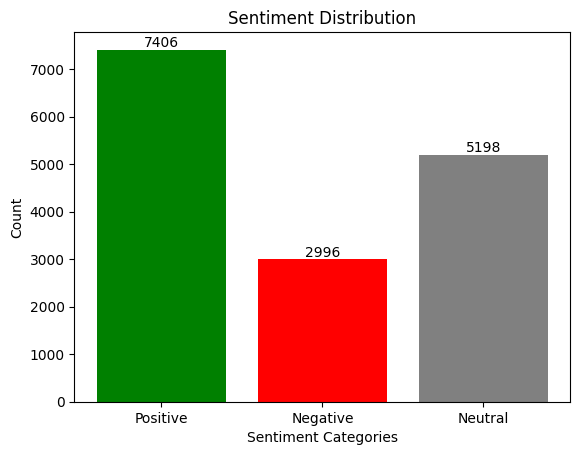

In [18]:
import matplotlib.pyplot as plt
sentiment_count = [
df['sentiment_category'].value_counts().get('positive',0),
df['sentiment_category'].value_counts().get('negative',0),
df['sentiment_category'].value_counts().get('neutral',0)
]
sentiment_categories = ['Positive','Negative','Neutral']
plt.bar(sentiment_categories, sentiment_count, color=['green', 'red', 'gray'])

# Add titles and labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Categories')
plt.ylabel('Count')

# Add values on top of the bars
for i, count in enumerate(sentiment_count):
    plt.text(i, count + 0.05, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

### Tweet Frequency Over Time

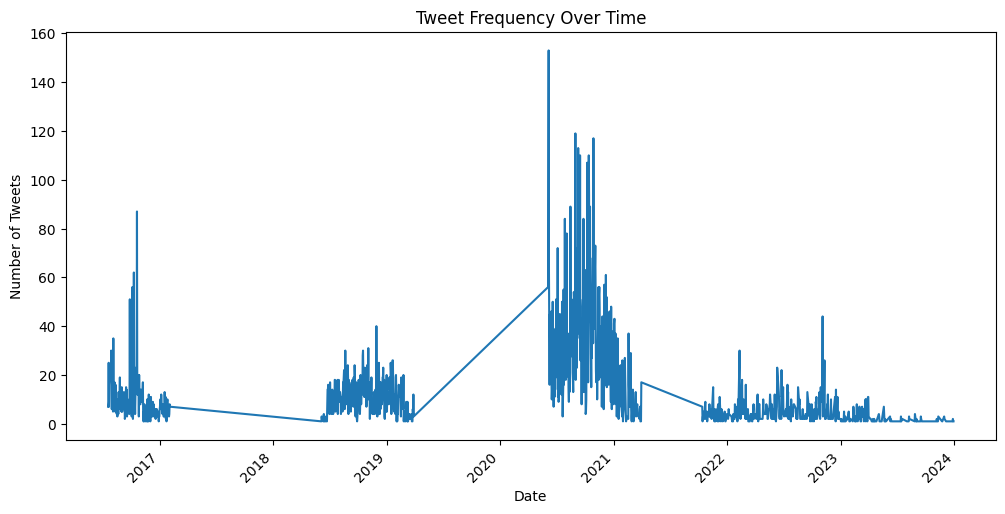

In [19]:

plt.figure(figsize=(12, 6))
df['Date'].value_counts().sort_index().plot()
plt.title("Tweet Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.show()

### Wordcloud

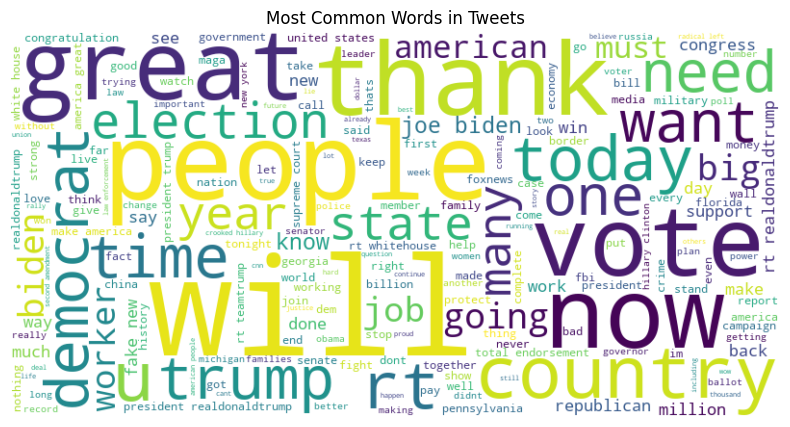

In [20]:
from wordcloud import WordCloud
tweet_text = " ".join(tweet for tweet in df['Tweet'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tweet_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.show()

### Tweets Before vs. After Elections (Example for 2020 Election)

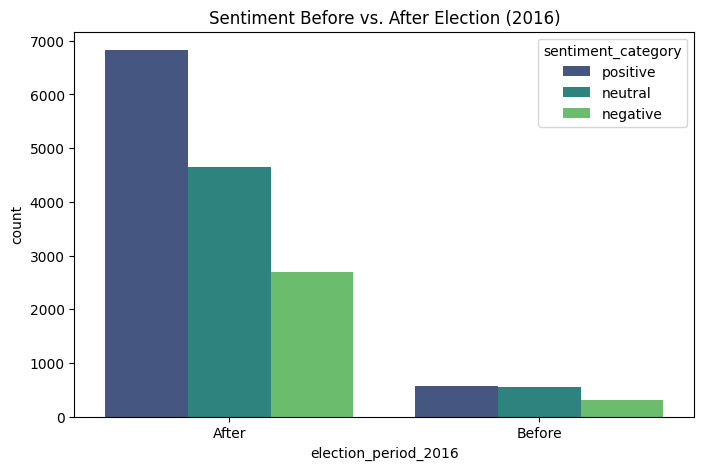

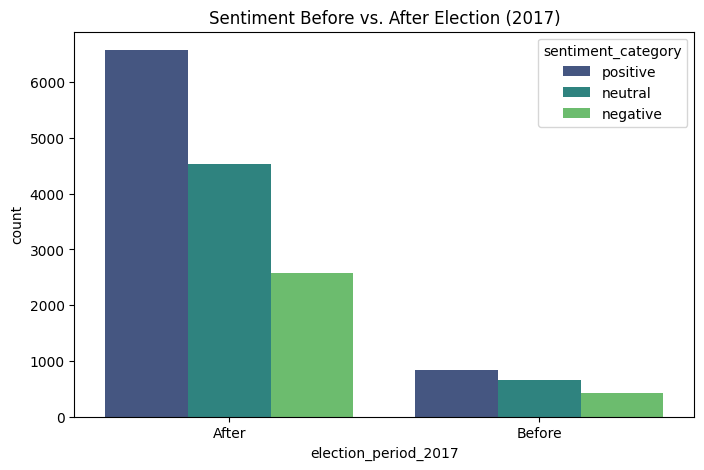

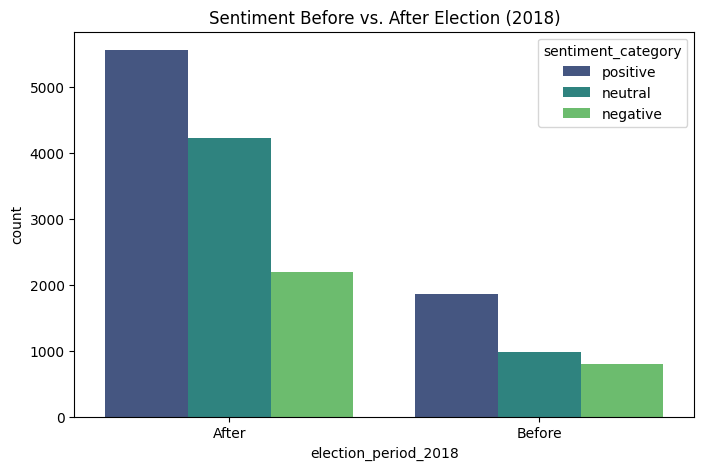

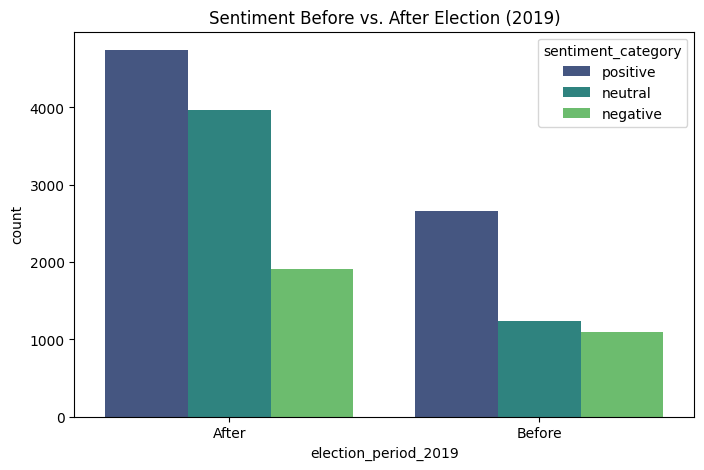

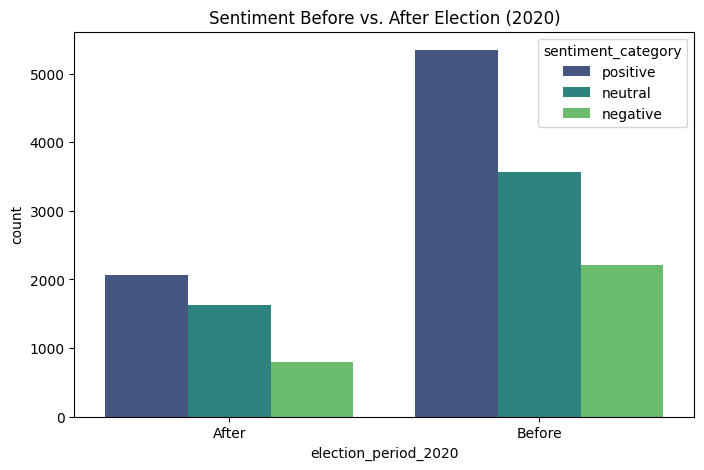

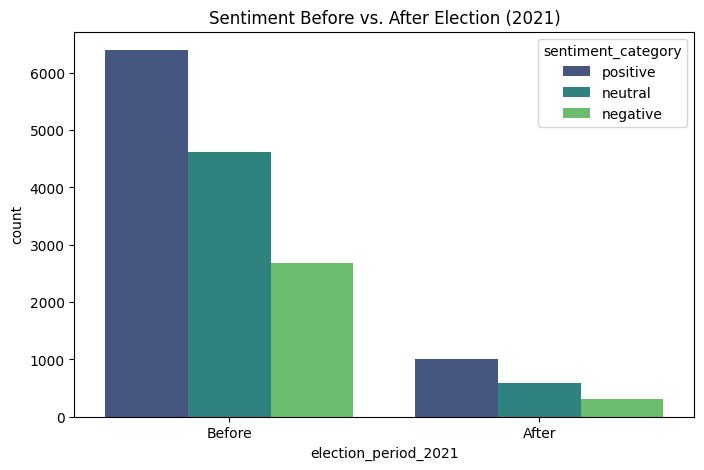

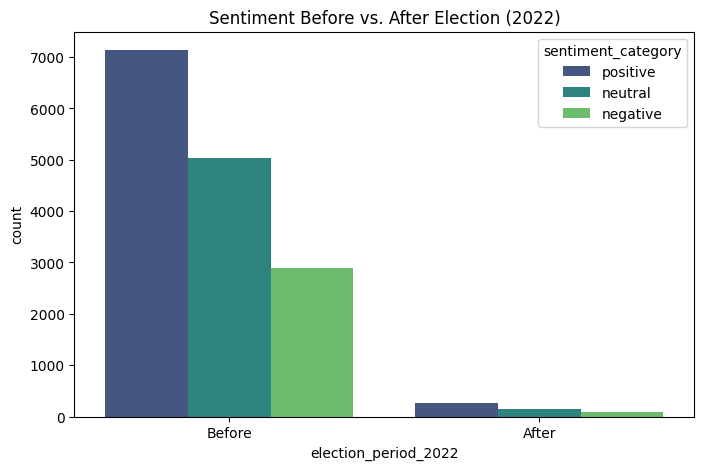

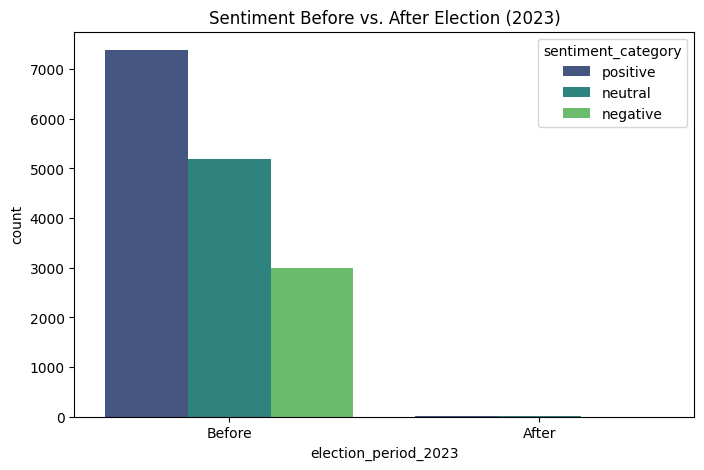

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Define election dates
election_dates = {
    2016: datetime(2016, 11, 8),
    2017: datetime(2017, 11, 7),
    2018: datetime(2018, 11, 6),
    2019: datetime(2019, 11, 5),
    2020: datetime(2020, 11, 3),
    2021: datetime(2021, 11, 2),
    2022: datetime(2022, 11, 8),
    2023: datetime(2023, 11, 7)
}

# Ensure the 'date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create plots for each election year
for year, election_date in election_dates.items():
    df[f'election_period_{year}'] = df['Date'].apply(lambda x: 'Before' if x < election_date else 'After')

    plt.figure(figsize=(8, 5))
    sns.countplot(x=f'election_period_{year}', hue='sentiment_category', data=df, palette='viridis')
    plt.title(f"Sentiment Before vs. After Election ({year})")
    plt.show()


### Tweet sentiment by politician before and after elections

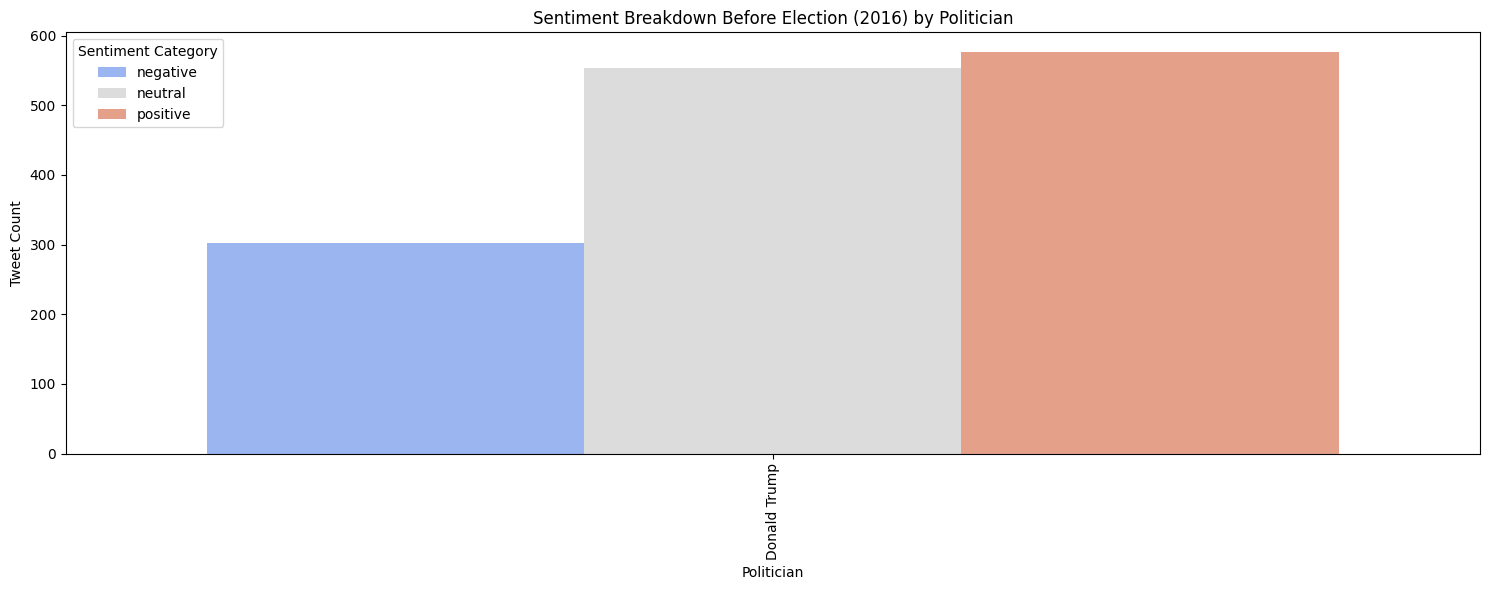

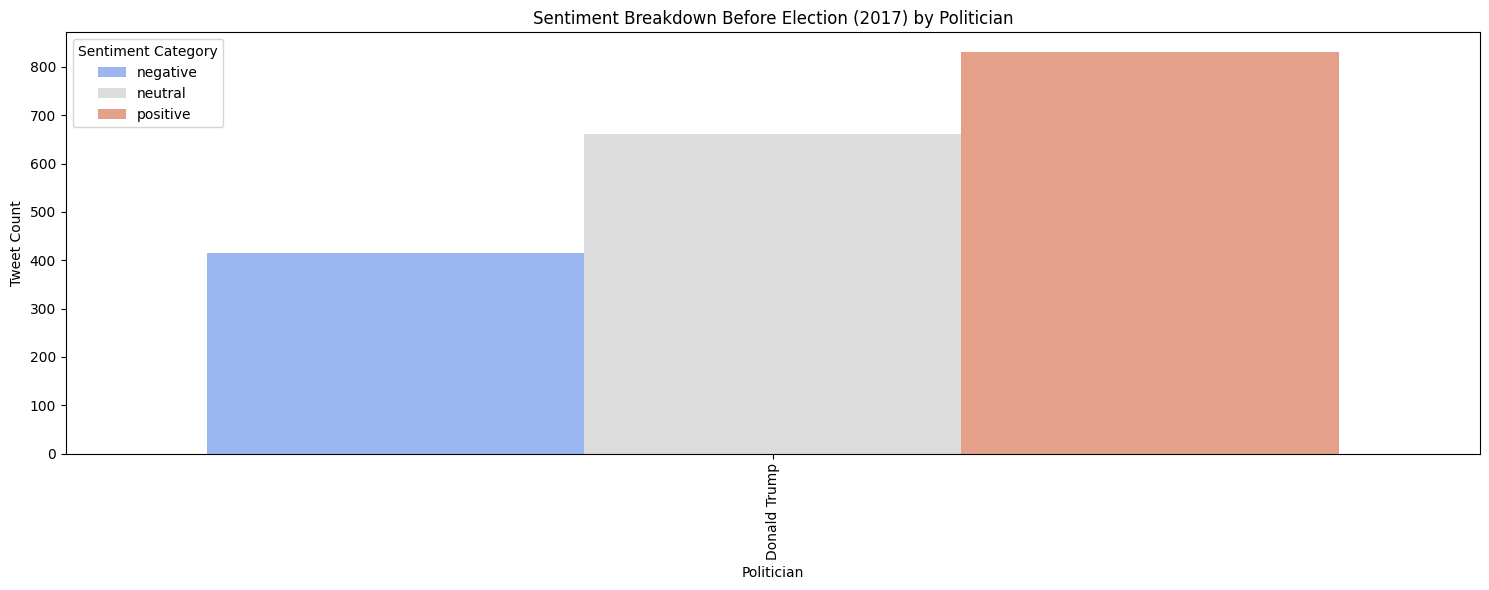

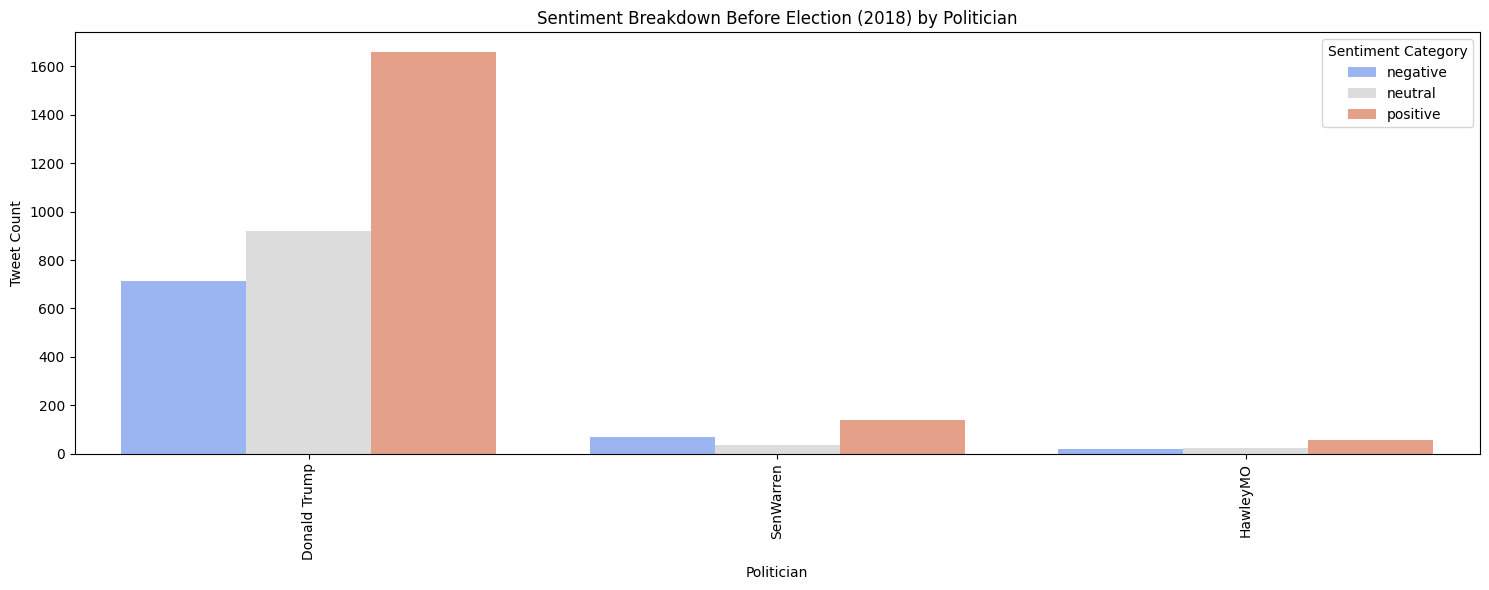

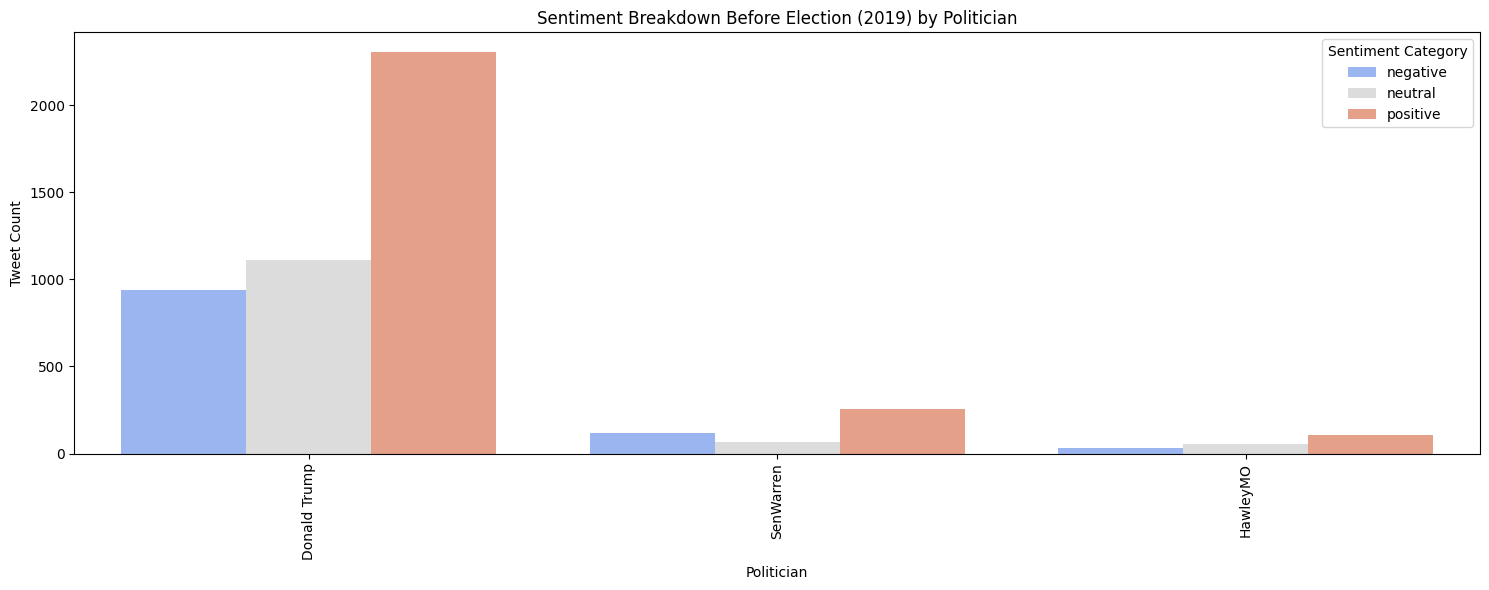

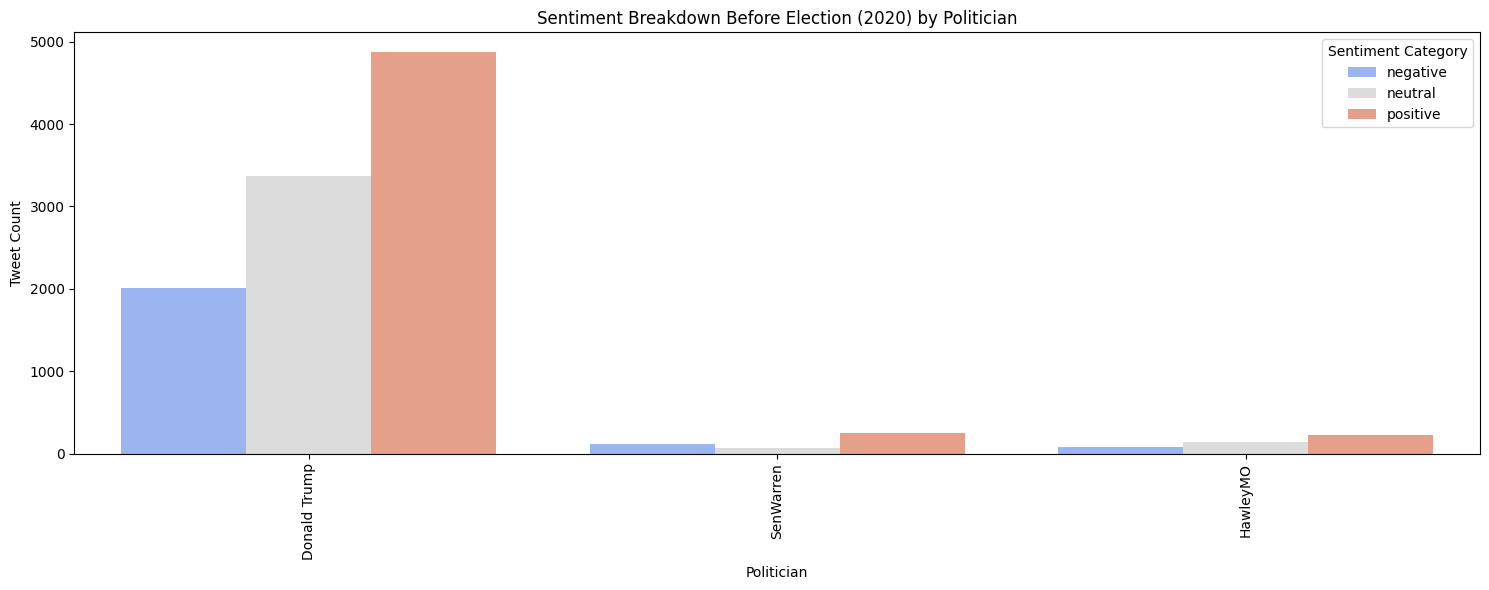

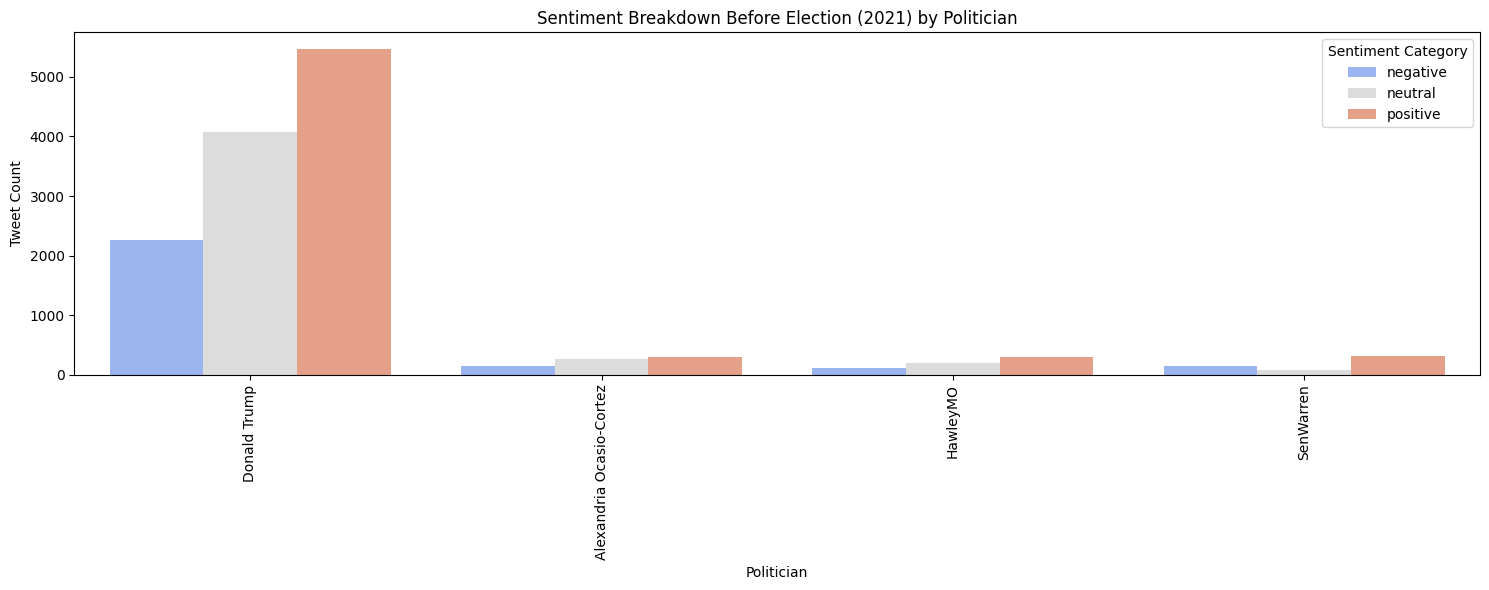

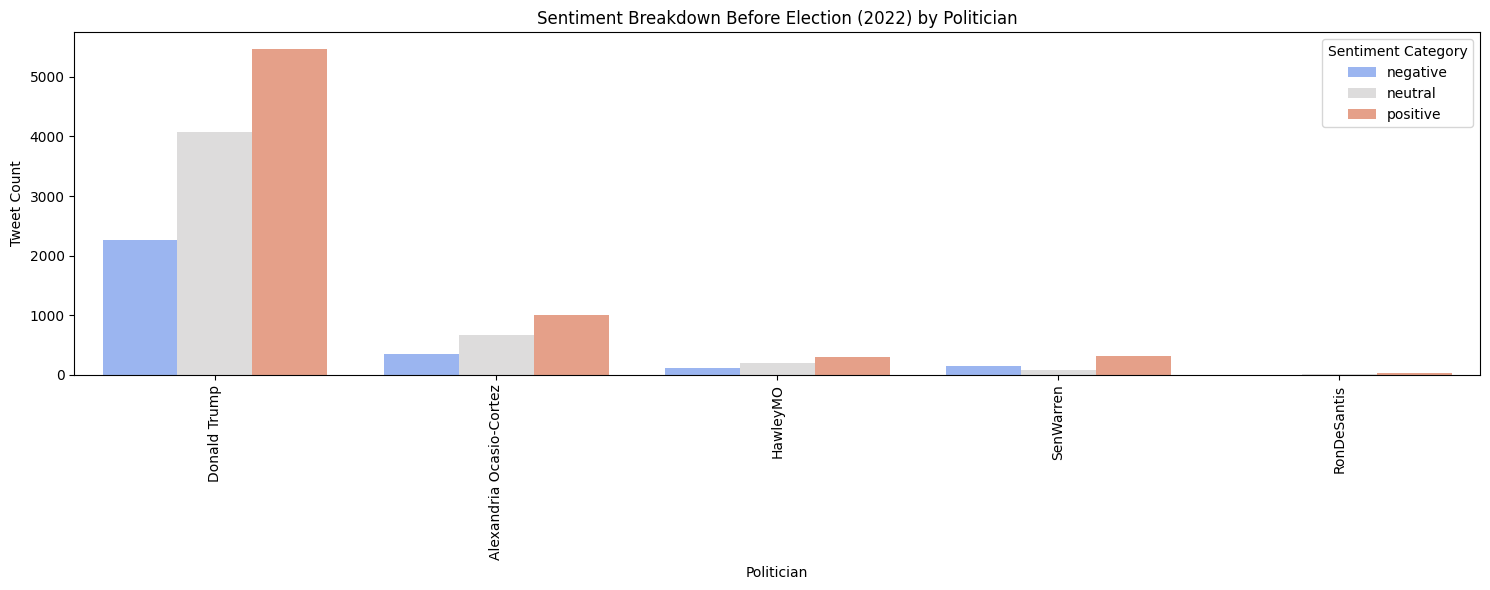

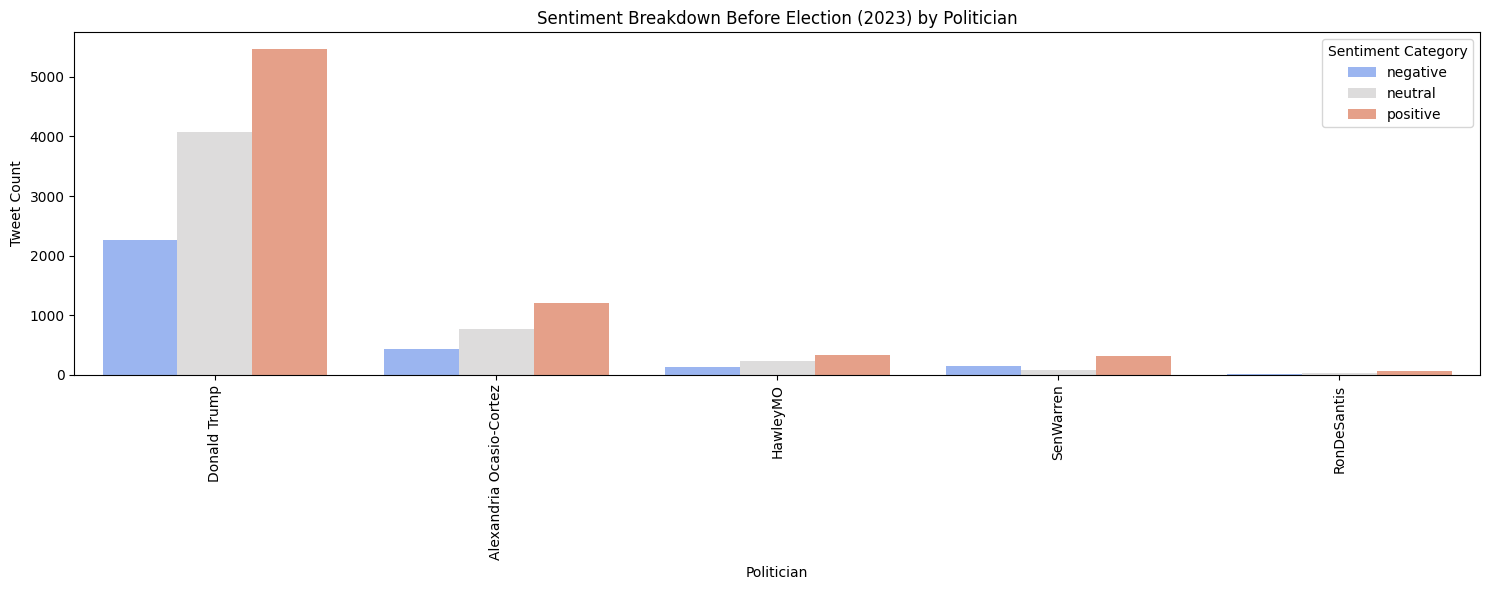

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pandas as pd

# Define election dates
election_dates = {
    2016: datetime(2016, 11, 8),
    2017: datetime(2017, 11, 7),
    2018: datetime(2018, 11, 6),
    2019: datetime(2019, 11, 5),
    2020: datetime(2020, 11, 3),
    2021: datetime(2021, 11, 2),
    2022: datetime(2022, 11, 8),
    2023: datetime(2023, 11, 7)
}

# Ensure 'date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Generate sentiment analysis by politician for each election year
for year, election_date in election_dates.items():
    # Add a column to indicate whether the tweet is before or after the election
    df[f'election_period_{year}'] = df['Date'].apply(lambda x: 'Before' if x < election_date else 'After')
    
    # Filter data for the current year's election period
    filtered_df = df[df[f'election_period_{year}'] == 'Before']  # You can change this to 'After' if needed
    
    # Group by politician and sentiment category to get counts
    grouped_df = filtered_df.groupby(['Politician_name', 'sentiment_category']).size().reset_index(name='count')
    
    # Plot sentiment breakdown per politician
    plt.figure(figsize=(15, 6))
    sns.barplot(
        x="Politician_name",
        y="count",
        hue="sentiment_category",
        data=grouped_df,
        palette='coolwarm',
        order=grouped_df.groupby('Politician_name')['count'].sum().sort_values(ascending=False).index
    )
    plt.title(f"Sentiment Breakdown Before Election ({year}) by Politician")
    plt.xlabel("Politician")
    plt.ylabel("Tweet Count")
    plt.xticks(rotation=90)
    plt.legend(title="Sentiment Category")
    plt.tight_layout()
    plt.show()

In [23]:
df.to_excel("Final_Cleaned_Tweets_For_PowerBI.xlsx", index=False)